In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy import units as u

In [55]:
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 1. #set the value globally
mpl.

In [2]:
kep_data = Table.read('../data/kepler_dr2_4arcsec.fits', format='fits')

In [4]:
kep_data.info

<Table masked=True length=241989>
          name           dtype         unit       n_bad
----------------------- ------- ----------------- -----
                angDist float64            arcsec     0
                  kepid   int64                       0
              source_id   int64                       0
                ra_gaia float64               deg     0
               ra_error float64      0.001 arcsec     0
               dec_gaia float64               deg     0
              dec_error float64      0.001 arcsec     0
               parallax float64      0.001 arcsec     0
         parallax_error float64      0.001 arcsec     0
                   pmra float64 0.001 arcsec / yr     0
             pmra_error float64 0.001 arcsec / yr     0
                  pmdec float64 0.001 arcsec / yr     0
            pmdec_error float64 0.001 arcsec / yr     0
       phot_g_mean_flux float64            ph / s     0
 phot_g_mean_flux_error float64            ph / s     0
        phot_g

In [11]:
kep_data['dist'] = 1.e3/kep_data['parallax']
kep_data['dist'].unit = u.pc
kep_data['abs_gmag'] = kep_data['phot_g_mean_mag'] - \
                            5.*(np.log10(kep_data['dist']) - 1.)
kep_data['abs_gmag'].unit = u.mag

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


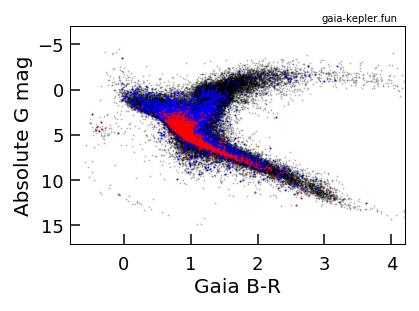

In [71]:
filter = (kep_data['phot_g_mean_mag'] <= 18.) & (kep_data['parallax'] > 0.1)
plt.scatter(kep_data['bp_rp'][filter], kep_data['abs_gmag'][filter], alpha=0.2, color='k', s=1)
filter2 = (kep_data['planet?'] == 'cand') & filter
plt.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], alpha=0.8, s=1, color='b')
filter2 = (kep_data['planet?'] == 'conf') & filter
plt.scatter(kep_data['bp_rp'][filter2], kep_data['abs_gmag'][filter2], alpha=0.8, s=1, color='r')
plt.xlabel('Gaia B-R', fontsize=20)
plt.ylabel('Absolute G mag', fontsize=20)
plt.ylim([17,-7])
plt.xlim([-0.8,4.2])
plt.text(0.75,1.02,'gaia-kepler.fun', transform=plt.gca().transAxes)
plt.savefig('../img/colormag_kepler.png')

[]

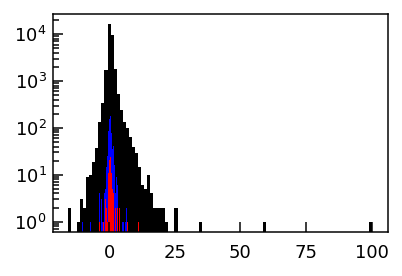

In [43]:
filter = (kep_data['phot_g_mean_mag'] >= 17.) & np.isfinite(kep_data['parallax'])
plt.hist(kep_data['parallax'][filter], bins=100, color='k')
filter2 = filter & (kep_data['planet?'] == 'cand')
plt.hist(kep_data['parallax'][filter2], bins=100, color='b')
filter2 = filter & (kep_data['planet?'] == 'conf')
plt.hist(kep_data['parallax'][filter2], bins=100, color='r')
plt.semilogy()